# Pós-graduação em Ciência da Computação - UFABC
## Projeto de Mineração de Dados - Professor Thiago Covões
### Alunos: Fernanda Borges e Thiago Rizuti

# Introdução

O objetivo do projeto é interpretar automaticamente captchas de áudio, que neste caso são áudios com quatro caracteres gravados pelos alunos separadamente e concatenados de forma aleatória em arquivos .wav.

Esta base foi crida considerando-se os seguintes caracteres: a,b,c,d,h,m,n,x,6,7. Ela contém 200 observações para o conjunto de treinamento e 147 observações para o conjunto de validação.

Primeiramente desenvolvemos classificadores capazes de distinguir cada caractere separadamente, sendo que cada caractere do captcha representa uma classe. Em seguida consideramos que para cada arquivo .wav recebido a predição é a combinação das predições individuais para cada caractere.

Para realizar este projeto foram usadas as bibliotecas:
- librosa, que é um pacote para análise de áudios e músicas; 
- pandas, que é uma ferramenta para estruturação e análise de dados;
- numpy, que é muito utilizada para computações científicas;
- matplotlib, que é utilizada principalmente para a plotagem de imagens em 2D;
- sklearn, que possui ferramentas para mineração de dados;

# Análise Exploratória

O primeiro desafio foi segmentar cada captcha separando o áudio referente a cada caractere. Para isso utilizamos a função load da biblioteca librosa que retorna a série temporal do áudio e a taxa de amostragem dela. Observamos os espectrogramas de alguns captchas e identificamos que eles condiziam com o processo de gravação dos áudios, pois havia uma separação visual a cada dois segundos (eixo Time) entre as oscilações mais representativas (eixo Hz).

In [65]:
import librosa 
import librosa.display as display
import pandas as pd 
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt 
%matplotlib inline
import os
import time

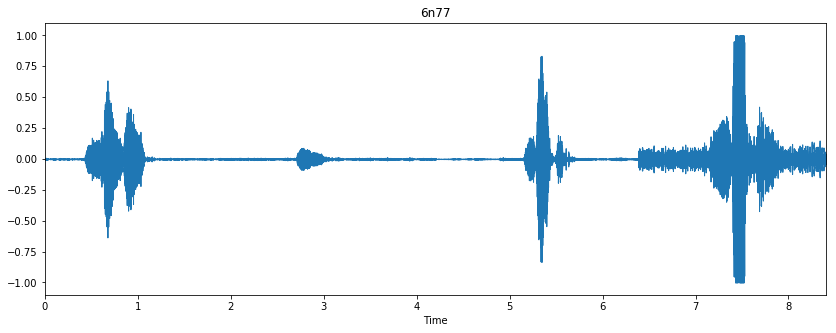

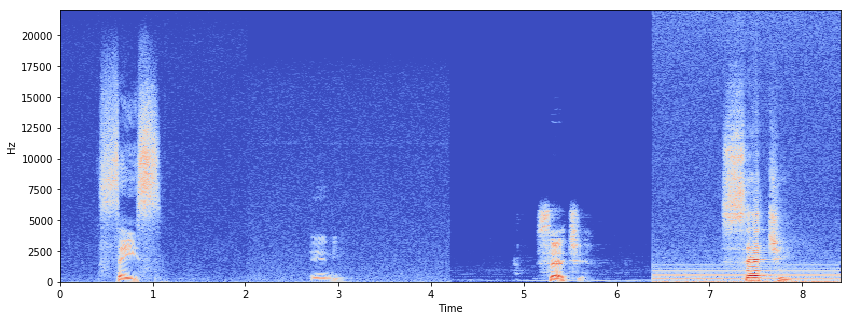

In [86]:
captcha = []
path = '/Users/fernandaborgesdasilva/Documents/Fernanda/Mestrado/mineracao de dados/projeto/fase_1_corrigida/base_treinamento_I/'
wavs = [file for file in os.listdir(path) if os.path.isfile(os.path.join(path, file)) and file.endswith('.wav')]
signal, sampling_rate = librosa.load(os.path.join(path,wavs[12]), None)
label_ = wavs[12].split('.wav')[0]

#Plot the amplitude envelope of a waveform.
plt.figure(figsize=(14, 5))
plt.title(label_)
librosa.display.waveplot(signal, sr=sampling_rate)

#Display a spectrogram/chromagram/cqt/etc.
X = librosa.stft(signal)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')

Decidimos então quebrar a série temporal de cada captcha em 4 intervalo de 2 segundos.

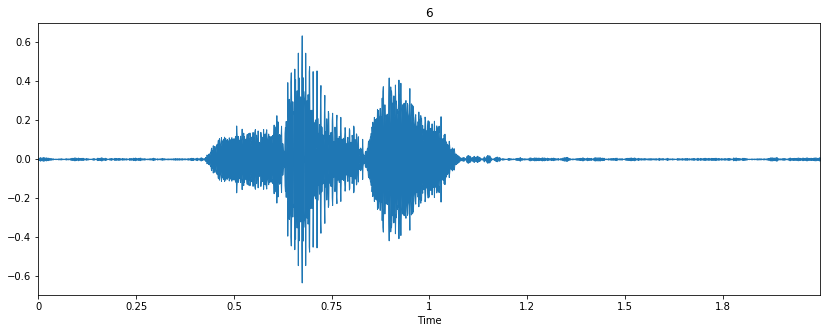

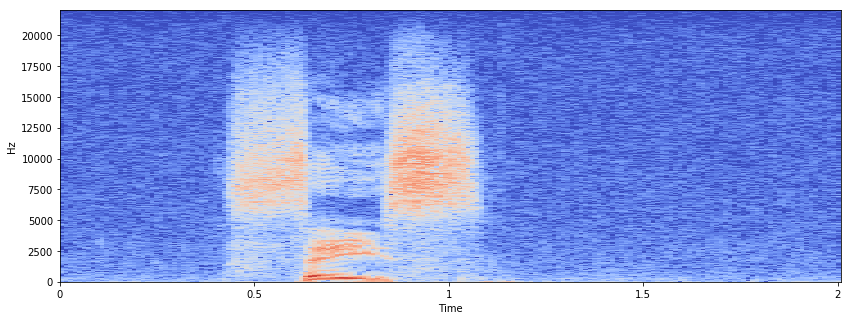

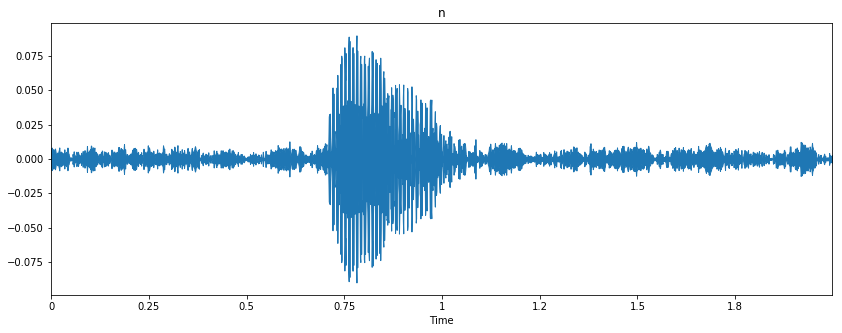

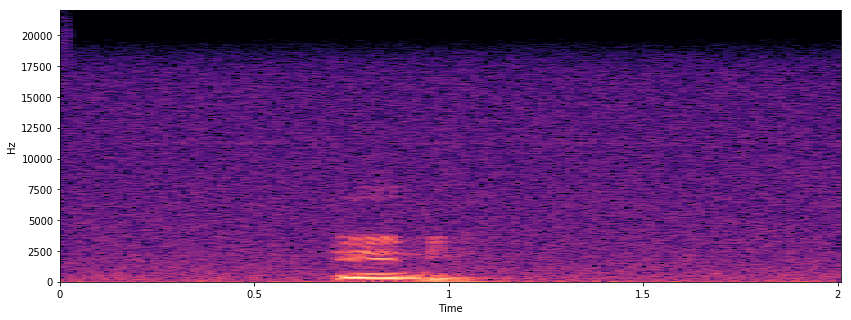

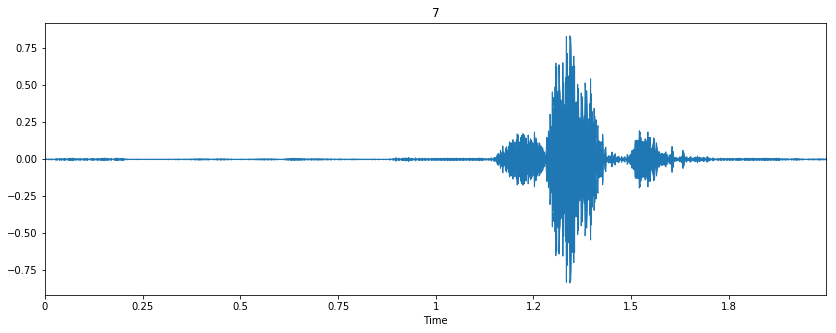

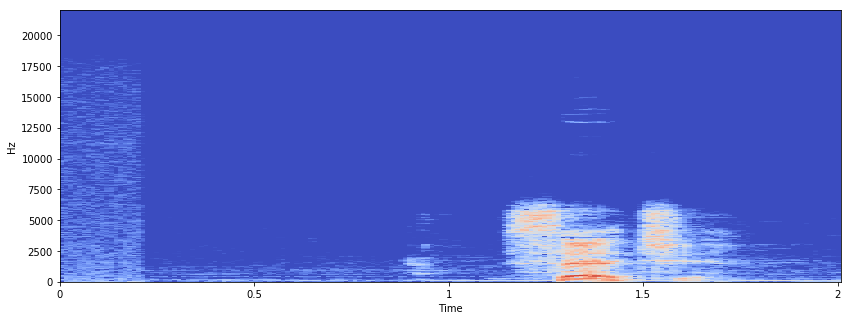

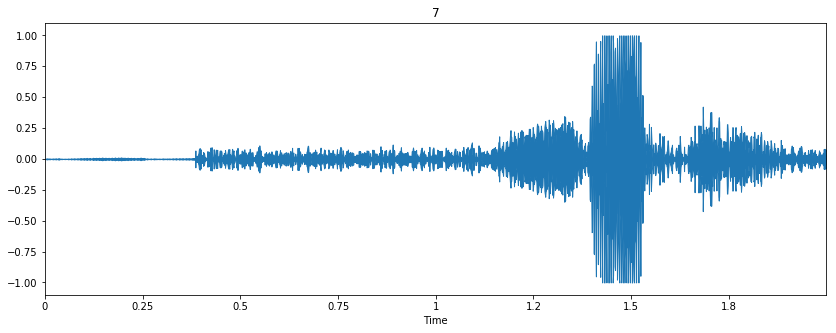

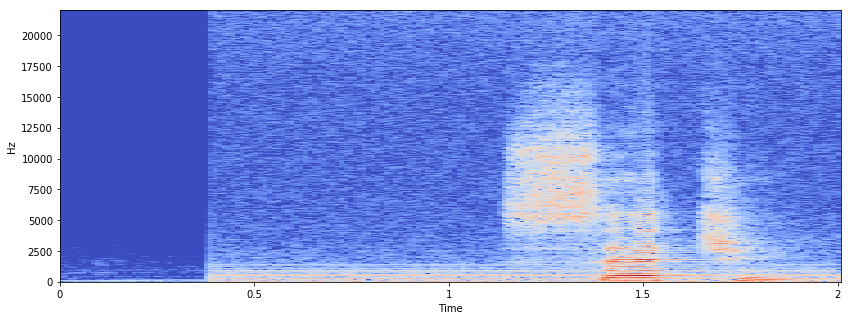

In [87]:
chars = [] 
chars += [(signal[sampling_rate*2*i:sampling_rate*2*(i+1)],sampling_rate,label_[i]) for i in range(4)]

for j, char in enumerate(chars):
    signal = char[0]
    sampling_rate = char[1]
    label_ = char[2]
    
    #Plot the amplitude envelope of a waveform.
    plt.figure(figsize=(14, 5))
    plt.title(label_)
    librosa.display.waveplot(signal, sr=sampling_rate)
    
    #Display a spectrogram/chromagram/cqt/etc.
    X = librosa.stft(signal)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')

Para a extração das variáveis de cada caractere utilizamos o Mel Frequency Cepstral Coefficents (MFCCs) que é a ferramenta amplamente utilizada para reconhecimento automático de fala.

Os sons gerados por humanos são filtrados pelo formato do trato vocal, incluindo a língua, os dentes, etc. Este formato determina como o som é emitido. Considerando que seja possível determinar acuradamente este formato, podemos então assumir que temos uma representação acurada do fonema que está sendo reproduzido. 

O formato do trato vocal se manifesta em um envelope do espectro de força em um espaço curto de tempo, e o trabalho dos MFCCs é representar este envelope de maneira precisa.

O processamento do Mel-Frequency Cepstral Coefficients realiza primeiramente o janelamento e aplica a Transformada Discreta de Fourier (DFT). A amplitude da Transformada de Fourier é filtrada por janelas triangulares na escala Mel e então aplica-se o logaritmo. A Transformada Discreta de Cosseno é aplicada e os Coeficientes Mel-Cepstrais são as amplitudes resultantes.

Na função extract_features utilizamos a funcionalidade librosa.feature.mfcc para obter a sequência de MFCCs de cada caractere. Este processo retorna uma matriz com 20 linhas e 173 colunas por caractere. Calculamos então a média da moda, o valor mínimo, o valor máximo, a média, o desvio padrão, a mediana, a amplitude interquartil, a curtose e a assimetria por linha, alcançando 180 atributos mais a classe.

#  Metodologia

Depois de extrair as variáveis pudemos adotar a mesma abordagem de quando se lida com um problema de classificação tradicional.

Nós utilizamos o GridSearchCV do sklearn para fazer o grid search com validação cruzada. Definimos o cv, parâmetro da função que é responsável pela estratégia de quebrar o conjunto de dados em diferentes pastas (validação cruzada), de modo que o conjunto de dados de treino disponibilizado pelo professor fosse utilizado para treino e o conjunto de dados de validação fosse utilizado para validação. Definimos também o estimator, com cada um dos modelos que queríamos testar, e o param_grid, com uma lista das diferentes combinações de parâmetros para cada modelo.

Então rodamos o grid search uma vez para cada um dos modelos com cada uma das diferentes combinações de parâmetros, calculando assim o best_score, que é a média das acurácias de cada pasta definida em cv para uma única combinação de parâmetros. Desta maneira foi possível escolher o melhor modelo com a melhor combinação de parâmetros selecionando o maior best_score.

Os modelos testados foram: Gaussian Naive Bayes, k-nearest neighbors, Regressão Logística, Árvore de Decisão e Random Forest.

#  Resultados
Apresente tabelas de resultados e gr´aficos que auxiliem a compreens˜ao dos mesmos.
Note que seu script de experimento deve deixar claro o c´odigo gerador de
cada tabela/gr´afico.

# Comentários Finais
Descreva os principais resultados obtidos e comente sobre: (i) dificuldades encontradas;
(ii) ideias que n˜ao foram exploradas e raz˜oes; N˜ao esquecer de enviar
junto ao relat´orio o script (de preferˆencia R/Python) que executa
os experimentos na base de dados e gera os resultados apresentados
aqui.

# Referências

http://www.practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/

http://abricom.org.br/wp-content/uploads/2016/03/bricsccicbic2013_submission_55.pdf

https://librosa.github.io/librosa/index.html

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html